# Segmentação de Clientes com base em análise RFM(Recência, Frequência e Valor Monetário)

**Objetivo:** Realizar a análise de cliente pelo método RFM :

- Recência: quão recente um cliente fez a compra;
- Frequência: com que frequência um cliente faz a compra;
- Valor Monetário: quanto dinheiro um cliente gasta em compras.

De acordo com essas métricas, é possível segmentar os clientes em grupos para entender quais deles compram muitas coisas com frequência, que compram poucas coisas, mas frequentemente, e que não compram nada há muito tempo.

**Link do dataset** Online Retail II - UCI Machine Learning Repository

>**Referência:** Formação Cientista de Dados (https://www.datascienceacademy.com.br/)

In [1]:
# Configurando dados de saída
options(scipen = 999,
        digits = 5,
        repos = 'http://cran.rstudio.com/',
        repr.plot.width = 20,
        repr.plot.height = 10)

In [ ]:
if(!require('pacman'))
install.packages('pacman')
library('pacman')
pacman::p_load('tidyverse', 'ggplot2', 'caret', 'plotly', 'readxl', 'rfm', 'stats','factoextra','plyr')

# 1. Importação da base de dados e bibliotecas

Esta seção apresenta a importando das bibliotecas necessárias para manipulações e tratamento dos dados e também a importação do arquivo excel (.xls) da base de dados.

In [4]:
# Carregar os dados da planilha
plan1 <- read_excel('/content/online_retail_II.xlsx', sheet = 'Year 2009-2010')
plan2 <- read_excel('/content/online_retail_II.xlsx', sheet = 'Year 2010-2011')
df <- rbind(plan1, plan2)

# 2. Definição das variáveis

- InvoiceNo: Número da fatura. Nominal. Um número integral de 6 dígitos atribuído exclusivamente a cada transação. Se esse código começar com a letra 'c', ele indica um cancelamento;

- StockCode: Código do produto (item). Nominal. Um número integral de 5 dígitos atribuído exclusivamente a cada produto distinto;

- Description: Nome do produto (item);

- Quantity: As quantidades de cada produto (item) por transação. Numérico;

- InvoiceDate: Data e hora invictas. Numérico. O dia e a hora em que uma transação foi gerada;

- UnitPrice: Preço unitário. Numérico. Preço do produto por unidade em libras esterlinas (Â£);

- CustomerID: Número do cliente. Nominal. Um número integral de 5 dígitos atribuído exclusivamente a cada cliente;

- Country: Nome do país. Nominal. O nome do país onde o cliente reside.

****

# 3. Análise Exploratória das variáveis

Nesta seção será explorado as variáveis para identificar os possíveis padrões e comportamentos, valores nulos, outliers e engenharia de atributos, se necessário.

In [21]:
# Carregar as 10 primeiras entradas do dataset
head(df)
head(sample(df))

Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Price
<chr>,<chr>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<fct>,<dbl>
489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0
489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085,United Kingdom,39.6


StockCode,Price,Total_Price,Country,Customer ID,Description,InvoiceDate,Invoice,Quantity
<chr>,<dbl>,<dbl>,<fct>,<dbl>,<chr>,<dttm>,<chr>,<dbl>
85048,6.95,83.4,United Kingdom,13085,15CM CHRISTMAS GLASS BALL 20 LIGHTS,2009-12-01 07:45:00,489434,12
79323P,6.75,81.0,United Kingdom,13085,PINK CHERRY LIGHTS,2009-12-01 07:45:00,489434,12
79323W,6.75,81.0,United Kingdom,13085,WHITE CHERRY LIGHTS,2009-12-01 07:45:00,489434,12
22041,2.10,100.8,United Kingdom,13085,"RECORD FRAME 7"" SINGLE SIZE",2009-12-01 07:45:00,489434,48
21232,1.25,30.0,United Kingdom,13085,STRAWBERRY CERAMIC TRINKET BOX,2009-12-01 07:45:00,489434,24
22064,1.65,39.6,United Kingdom,13085,PINK DOUGHNUT TRINKET POT,2009-12-01 07:45:00,489434,24


In [6]:
# Analisar as dimensões do dataset (linhas x colunas)
dim(df)

[1] 1067371       8

In [7]:
# Verificar o nome das variáveis(colunas)
names(df)

[1] "Invoice"     "StockCode"   "Description" "Quantity"    "InvoiceDate"
[6] "Price"       "Customer ID" "Country"

In [8]:
# Verificar o tipo das variáveis
str(df)

tibble [1,067,371 × 8] (S3: tbl_df/tbl/data.frame)
 $ Invoice    : chr [1:1067371] "489434" "489434" "489434" "489434" ...
 $ StockCode  : chr [1:1067371] "85048" "79323P" "79323W" "22041" ...
 $ Description: chr [1:1067371] "15CM CHRISTMAS GLASS BALL 20 LIGHTS" "PINK CHERRY LIGHTS" "WHITE CHERRY LIGHTS" "RECORD FRAME 7\" SINGLE SIZE" ...
 $ Quantity   : num [1:1067371] 12 12 12 48 24 24 24 10 12 12 ...
 $ InvoiceDate: POSIXct[1:1067371], format: "2009-12-01 07:45:00" "2009-12-01 07:45:00" ...
 $ Price      : num [1:1067371] 6.95 6.75 6.75 2.1 1.25 1.65 1.25 5.95 2.55 3.75 ...
 $ Customer ID: num [1:1067371] 13085 13085 13085 13085 13085 ...
 $ Country    : chr [1:1067371] "United Kingdom" "United Kingdom" "United Kingdom" "United Kingdom" ...


In [9]:
# Transformando a variável "country" em factor, devido ser categórica nominal
table(df$Country)
df$Country <- as.factor(df$Country)


           Australia              Austria              Bahrain 
                1913                  938                  126 
             Belgium              Bermuda               Brazil 
                3123                   34                   94 
              Canada      Channel Islands               Cyprus 
                 228                 1664                 1176 
      Czech Republic              Denmark                 EIRE 
                  30                  817                17866 
  European Community              Finland               France 
                  61                 1049                14330 
             Germany               Greece            Hong Kong 
               17624                  663                  364 
             Iceland               Israel                Italy 
                 253                  371                 1534 
               Japan                Korea              Lebanon 
                 582                   

Como trabalharemos com operações matemáticas, será necessário que as variáveis não apresentem valores nulos, bem como a dimensão da base possui 1067371 linhas, então removeremos os valores ausentes das variáveis "Description" e "Customer ID", pois não podemos inputar nenhuma informação para suprir essas ausências, visto que irá influenciar nas estatísticas de compra do cliente e portanto na análise RFM.

In [10]:
# Criando uma coluna de Preço Total
df$Total_Price <- df$Quantity * df$Price
head(df$Total_Price)

[1]  83.4  81.0  81.0 100.8  30.0  39.6

In [11]:
# Criando uma cópia do dataset original
df_copy <- df

In [12]:
# Removendo os valores ausentes do dataset
df_copy <- na.omit(df)

# Seleciona os valores que NÃO são do tipo C na coluna "Invoice"
df_copy <- df_copy[!grepl("C",df_copy$Invoice),]
dim(df_copy)

# Resultado final do dataset após a limpeza
print(paste0("Foram removidas: ",
             dim(df)[1] - dim(df_copy)[1],
             "(",
             round(((dim(df)[1] - dim(df_copy)[1])/dim(df)[1]) * 100, digits = 2),
             "%) linhas após a limpeza"))

[1] 805620      9

[1] "Foram removidas: 261751(24.52%) linhas após a limpeza"


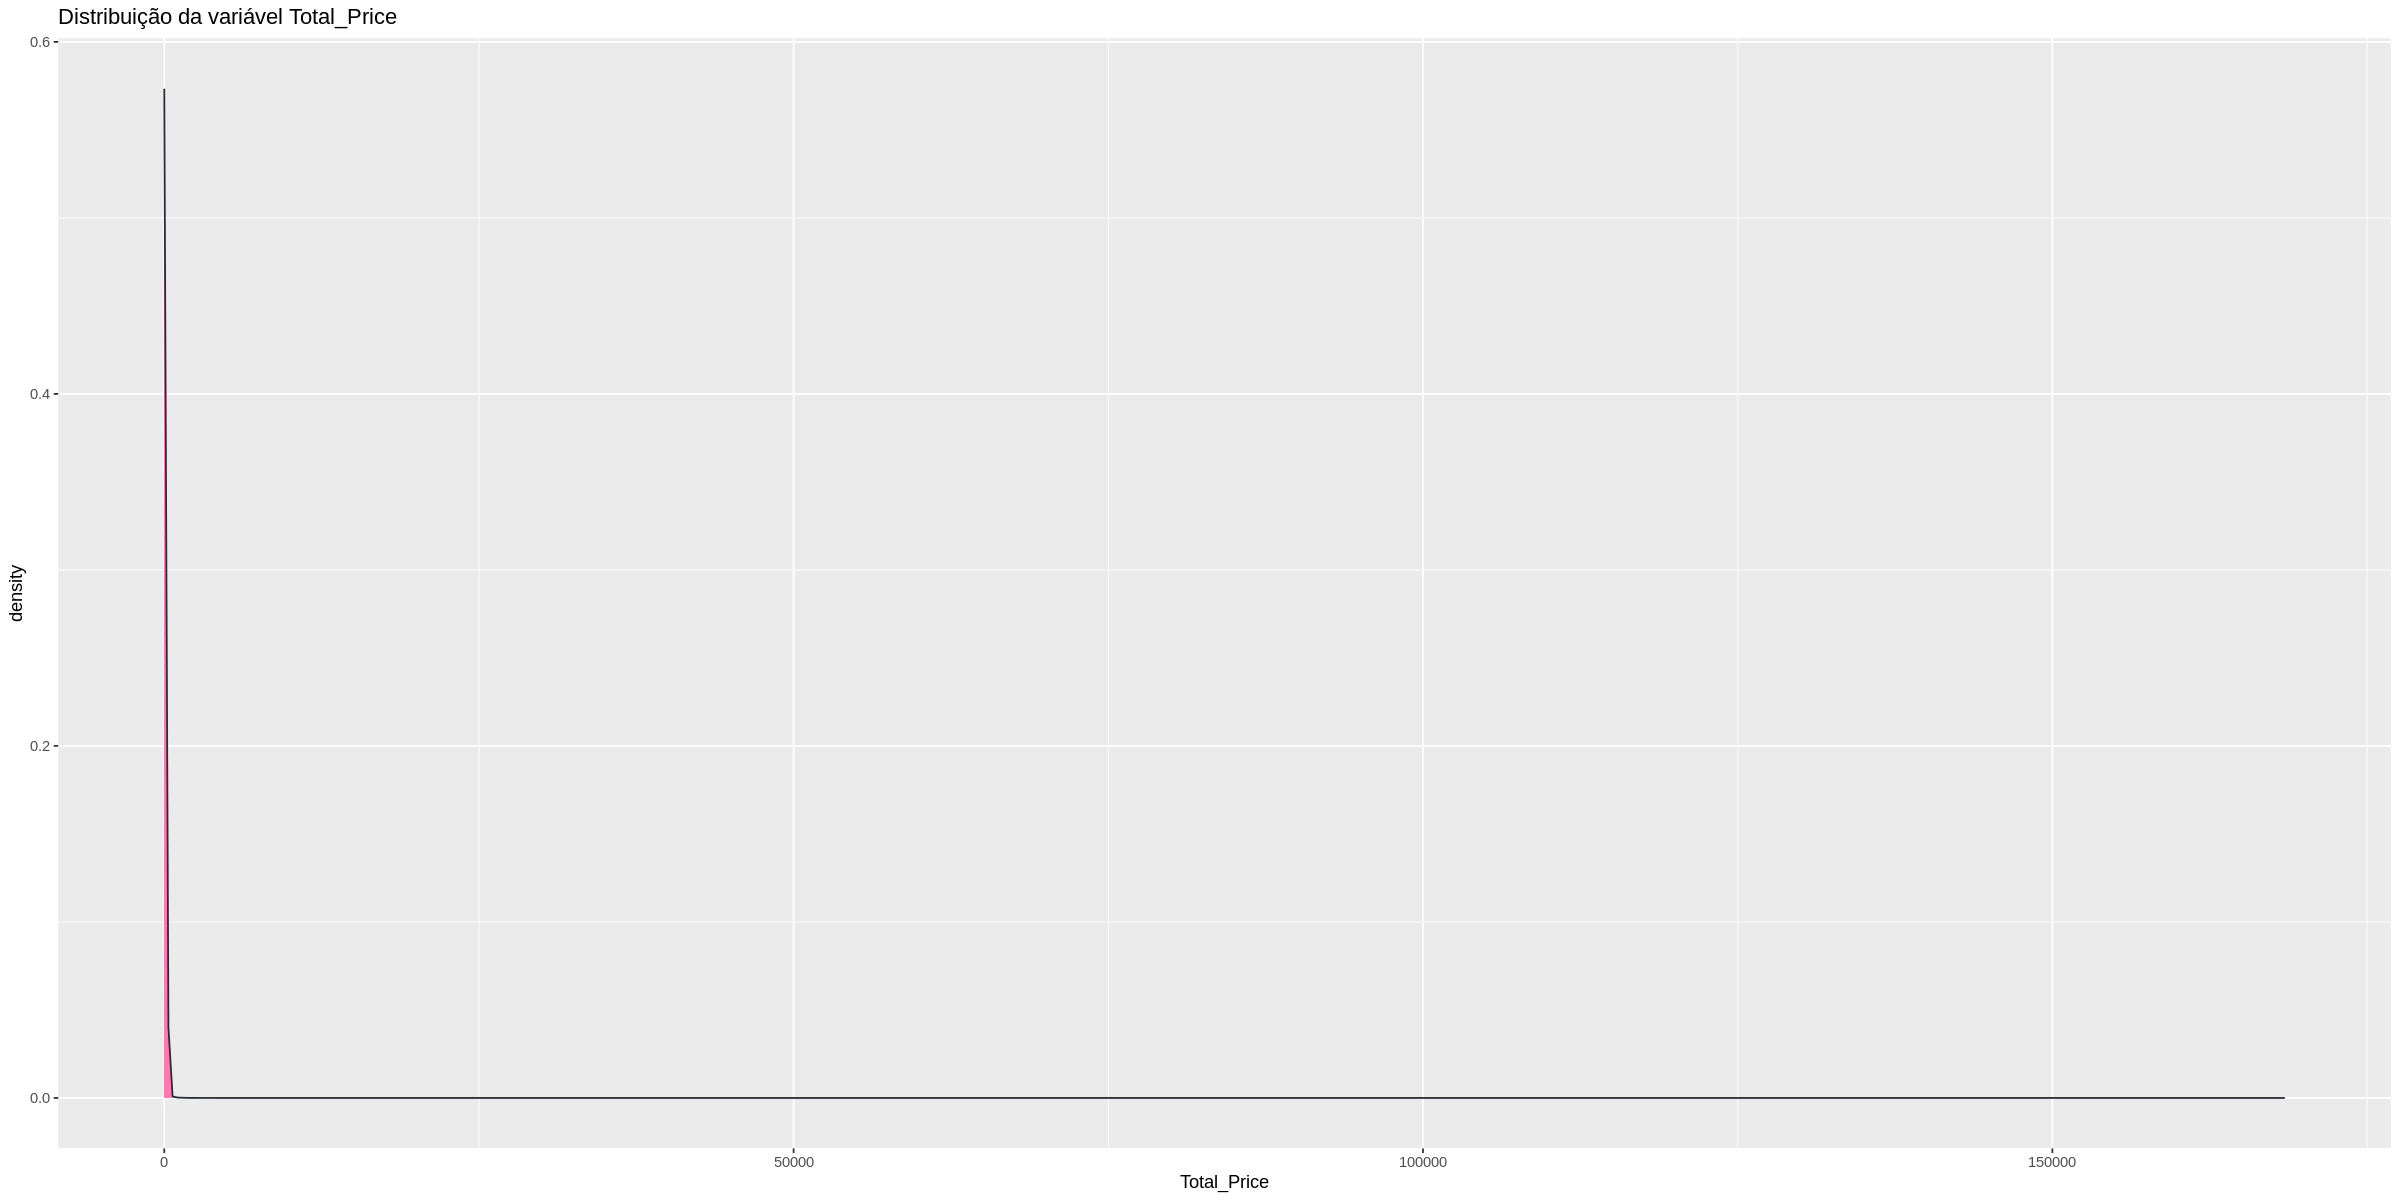

In [13]:
# Verificando a disposição da variável "Total_Price"
ggplot(
  df_copy,
  mapping = aes(x = Total_Price)) +
  geom_density(fill = "#ff79ae", color = "#282a36", alpha = 3.5) +
  labs(title = "Distribuição da variável Total_Price")

In [14]:
# Quantidade de transações
length(df_copy$`Customer ID`)

[1] 805620

In [15]:
# Quantidade de clientes
length(unique(df_copy$`Customer ID`))

[1] 5881

In [16]:
# Transformando em data table
df_copy <- data.table::data.table(df_copy)

# Valor Monetário por cliente
valor_monetario <- df_copy[,.(Total = sum(Total_Price)), by = `Customer ID`][order(desc(Total))]
print(valor_monetario)

      Customer ID     Total
            <num>     <num>
   1:       18102 608821.65
   2:       14646 528602.52
   3:       14156 313946.37
   4:       14911 295972.63
   5:       17450 246973.09
  ---                      
5877:       16738      3.75
5878:       14095      2.95
5879:       14103      0.00
5880:       14827      0.00
5881:       13256      0.00


In [17]:
print(summary(valor_monetario$Total))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0     348     898    3017    2304  608822 


In [18]:
# Cálculo da Recência
max(df_copy$InvoiceDate)
data_ref <- as.Date.character("25/12/2011", "%d/%m/%Y")

converter_data <- function(x){
  options(digits.secs = 3)
  return(as.Date(as.POSIXct(x$InvoiceDate,'GMT')))
}

# Alterando a coluna InvoiceDate para ocultar o horário
df_copy$InvoiceDate <- converter_data(df_copy)
head(df_copy)

[1] "2011-12-09 12:50:00 UTC"

Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Price
<chr>,<chr>,<chr>,<dbl>,<date>,<dbl>,<dbl>,<fct>,<dbl>
489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085,United Kingdom,83.4
489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085,United Kingdom,81.0
489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085,United Kingdom,81.0
489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085,United Kingdom,100.8
489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085,United Kingdom,30.0
489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01,1.65,13085,United Kingdom,39.6


In [20]:
# Calculando o RFM
calculo_rfm <- df_copy[,
        .(Recencia = as.numeric(data_ref - max(InvoiceDate)),
          Frequencia = .N,
          Monetario = sum(Total_Price),
          Primeira_compra = min(InvoiceDate)),
        by = `Customer ID`]

head(calculo_rfm)

Customer ID,Recencia,Frequencia,Monetario,Primeira_compra
<dbl>,<dbl>,<int>,<dbl>,<date>
13085,173,84,2433.28,2009-12-01
13078,19,801,29532.45,2009-12-01
15362,464,40,613.08,2009-12-01
18102,16,1058,608821.65,2009-12-01
12682,19,1039,24033.91,2009-12-01
18087,114,88,14761.52,2009-12-01


In [ ]:
# Removendo os Outliers (Valores muito distantes da média)
Q1 <- quantile(calculo_rfm$Monetario, .25)
Q3 <- quantile(calculo_rfm$Monetario, .75)
IQR <- IQR(calculo_rfm$Monetario)

calculo_rfm <- subset(
                calculo_rfm,
                calculo_rfm$Monetario >= (Q1 - 1.5*IQR) &
                calculo_rfm$Monetario <= (Q3 + 1.5*IQR)
                                    )

head(calculo_rfm)

# 4. Machine Learning - Clusterização Kmeans

Nesta seção será criado um modelo de algoritmo não supervisionado do tipo Cluster Kmeans, na qual agrupa os dados em clusters (grupos) com base em suas características, sem a necessidade de rótulos prévios. O algoritmo tenta encontrar estruturas nos dados agrupando-os em um número pré-definido de clusters, minimizando a variação dentro de cada cluster e maximizando a variação entre os clusters.

In [22]:
# Set seed
set.seed(42)

In [24]:
# Cria uma lista
resultados <- list()

# Filtrando somente as colunas necessárias
dados_rfm <- calculo_rfm %>%
  select(Recencia, Frequencia, Monetario)

head(dados_rfm)

Recencia,Frequencia,Monetario
<dbl>,<int>,<dbl>
173,84,2433.28
19,801,29532.45
464,40,613.08
16,1058,608821.65
19,1039,24033.91
114,88,14761.52


In [25]:
# Cria o modelo e divide em 5 grupos
# com base na distância entre os pontos
modelo_kmeans <- kmeans(dados_rfm,
                        centers = 5,
                        iter.max = 50)

In [27]:
# Verificando o modelo criado
head(modelo_kmeans)

,Recencia,Frequencia,Monetario
1,66.451,597.525,16199.1
2,72.889,1903.185,83053.8
3,19.833,3193.167,232908.5
4,16.500,2456.000,568712.1
5,225.979,99.783,1474.9


In [28]:
# Plot do modelo
resultados$plot <- fviz_cluster(modelo_kmeans,
                                data = dados_rfm,
                                geom = c('point'),
                                ellipse.type = 'euclid')

Too few points to calculate an ellipse


$plot


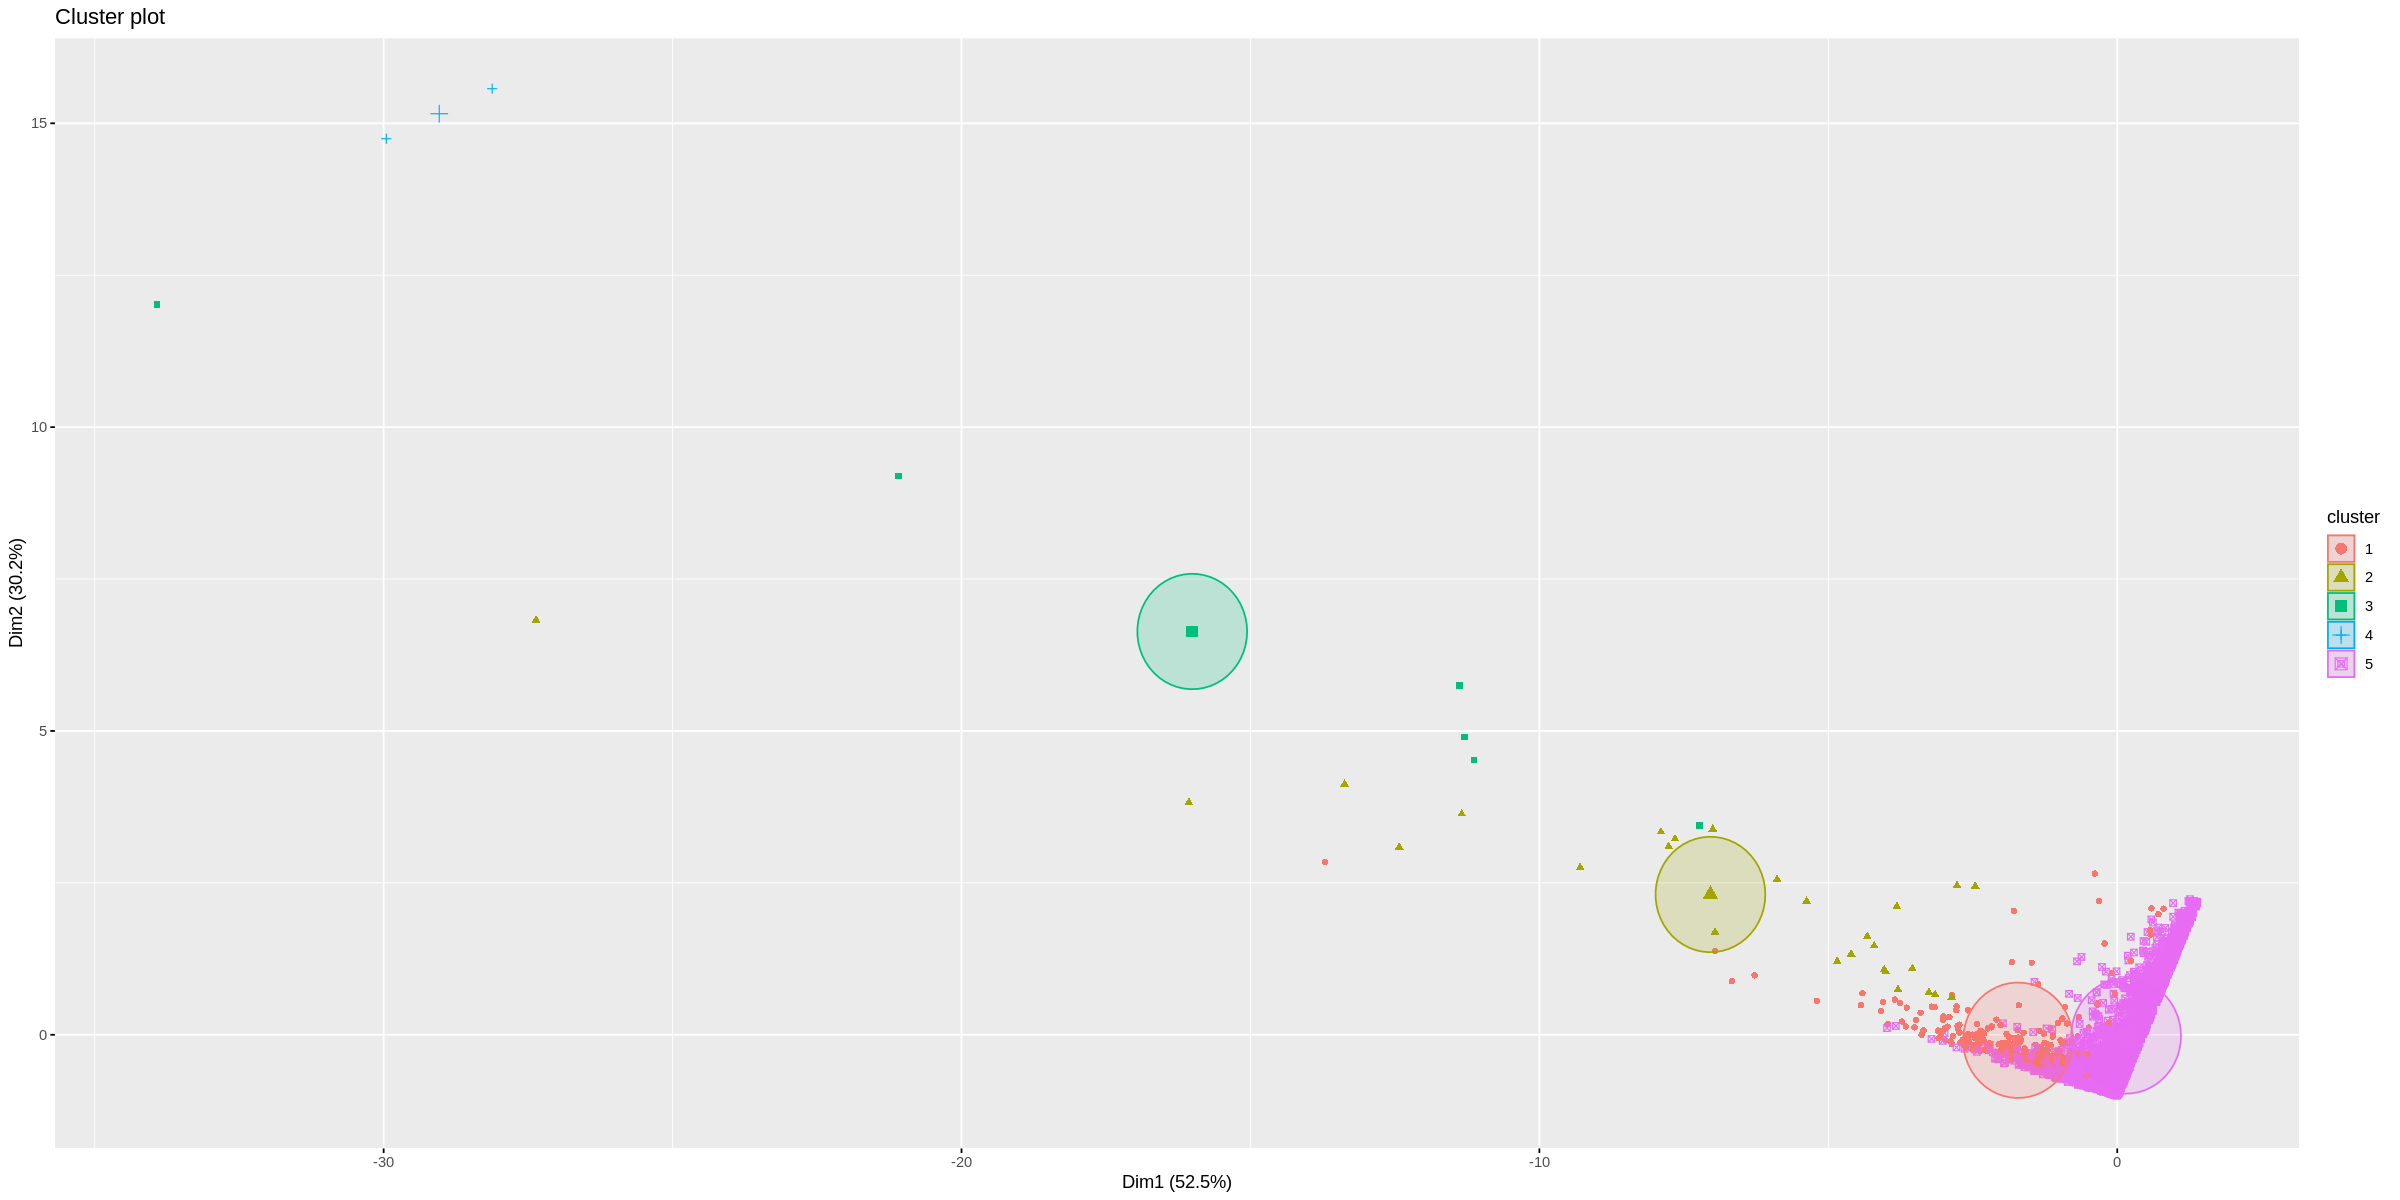

In [29]:
# Organiza os dados
# Retornando os dados do ID para identificar os clientes
dados_rfm$Customer_ID <- calculo_rfm$`Customer ID`
dados_rfm$clusters <- modelo_kmeans$cluster

resultados$data <- dados_rfm

grafico <- resultados[1]
grafico

In [30]:
tab <- as.data.frame(resultados[2])
head(tab)

,data.Recencia,data.Frequencia,data.Monetario,data.Customer_ID,data.clusters
,<dbl>,<int>,<dbl>,<dbl>,<int>
1,173,84,2433.28,13085,5
2,19,801,29532.45,13078,1
3,464,40,613.08,15362,5
4,16,1058,608821.65,18102,4
5,19,1039,24033.91,12682,1
6,114,88,14761.52,18087,1


In [31]:
# Analisando os resultados da tabela dos cliente
clusters_clientes <- data.table::data.table(tab)

In [32]:
# Frequência dos clientes por Clusters
clusters_clientes[,
                  .(Total = .N),
                  by = data.clusters
                  ][order(desc(Total))]

data.clusters,Total
<int>,<int>
5,5551
1,295
2,27
3,6
4,2


In [33]:
# Média de Recencias por clusters
clusters_clientes[,
                  .(Media_recencia = median(data.Recencia),
                    Media_frequencia = median(data.Frequencia),
                    Media_monetario = median(data.Monetario)),
                  by = data.clusters
                  ]

data.clusters,Media_recencia,Media_frequencia,Media_monetario
<int>,<dbl>,<dbl>,<dbl>
5,129.0,49,806.57
1,30.0,476,13370.86
4,16.5,2456,568712.08
2,23.0,722,70884.07
3,18.5,1718,221727.95


In [48]:
names(clusters_clientes)

[1] "data.Recencia"    "data.Frequencia"  "data.Monetario"   "data.Customer_ID"
[5] "data.clusters"

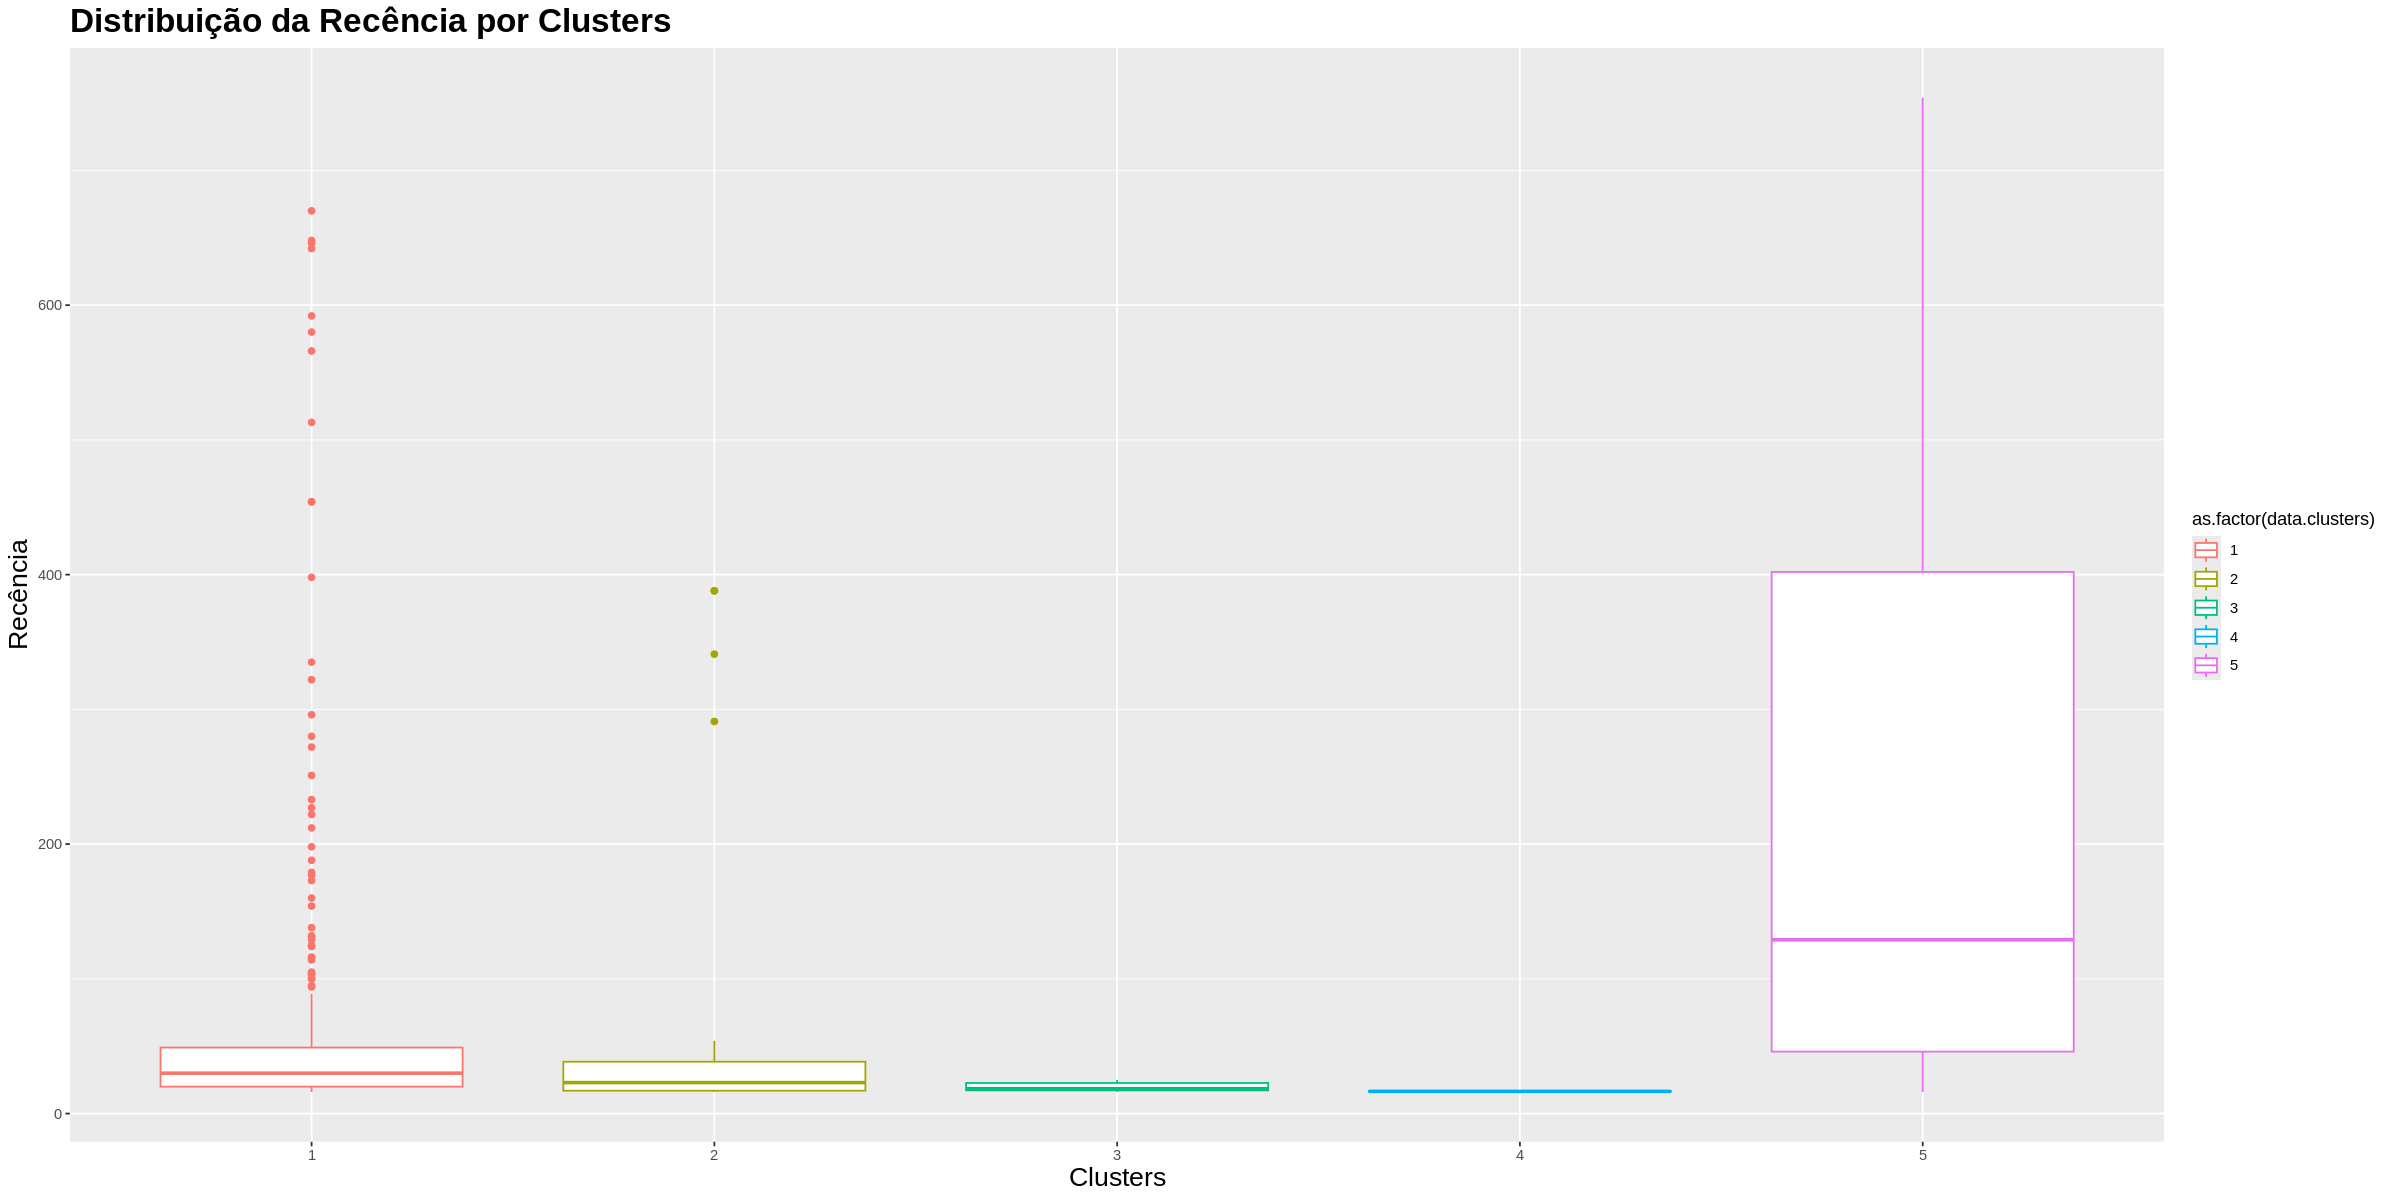

In [60]:
# Boxplor de Recência por clusters
ggplot(clusters_clientes, aes(as.factor(data.clusters), data.Recencia )) +
  geom_boxplot(aes(colour = as.factor(data.clusters))) +
   labs(title = "Distribuição da Recência por Clusters",
       x = "Clusters",
       y = "Recência") +
  theme(
    plot.title = element_text(size = 20, face = "bold"),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16)
  )

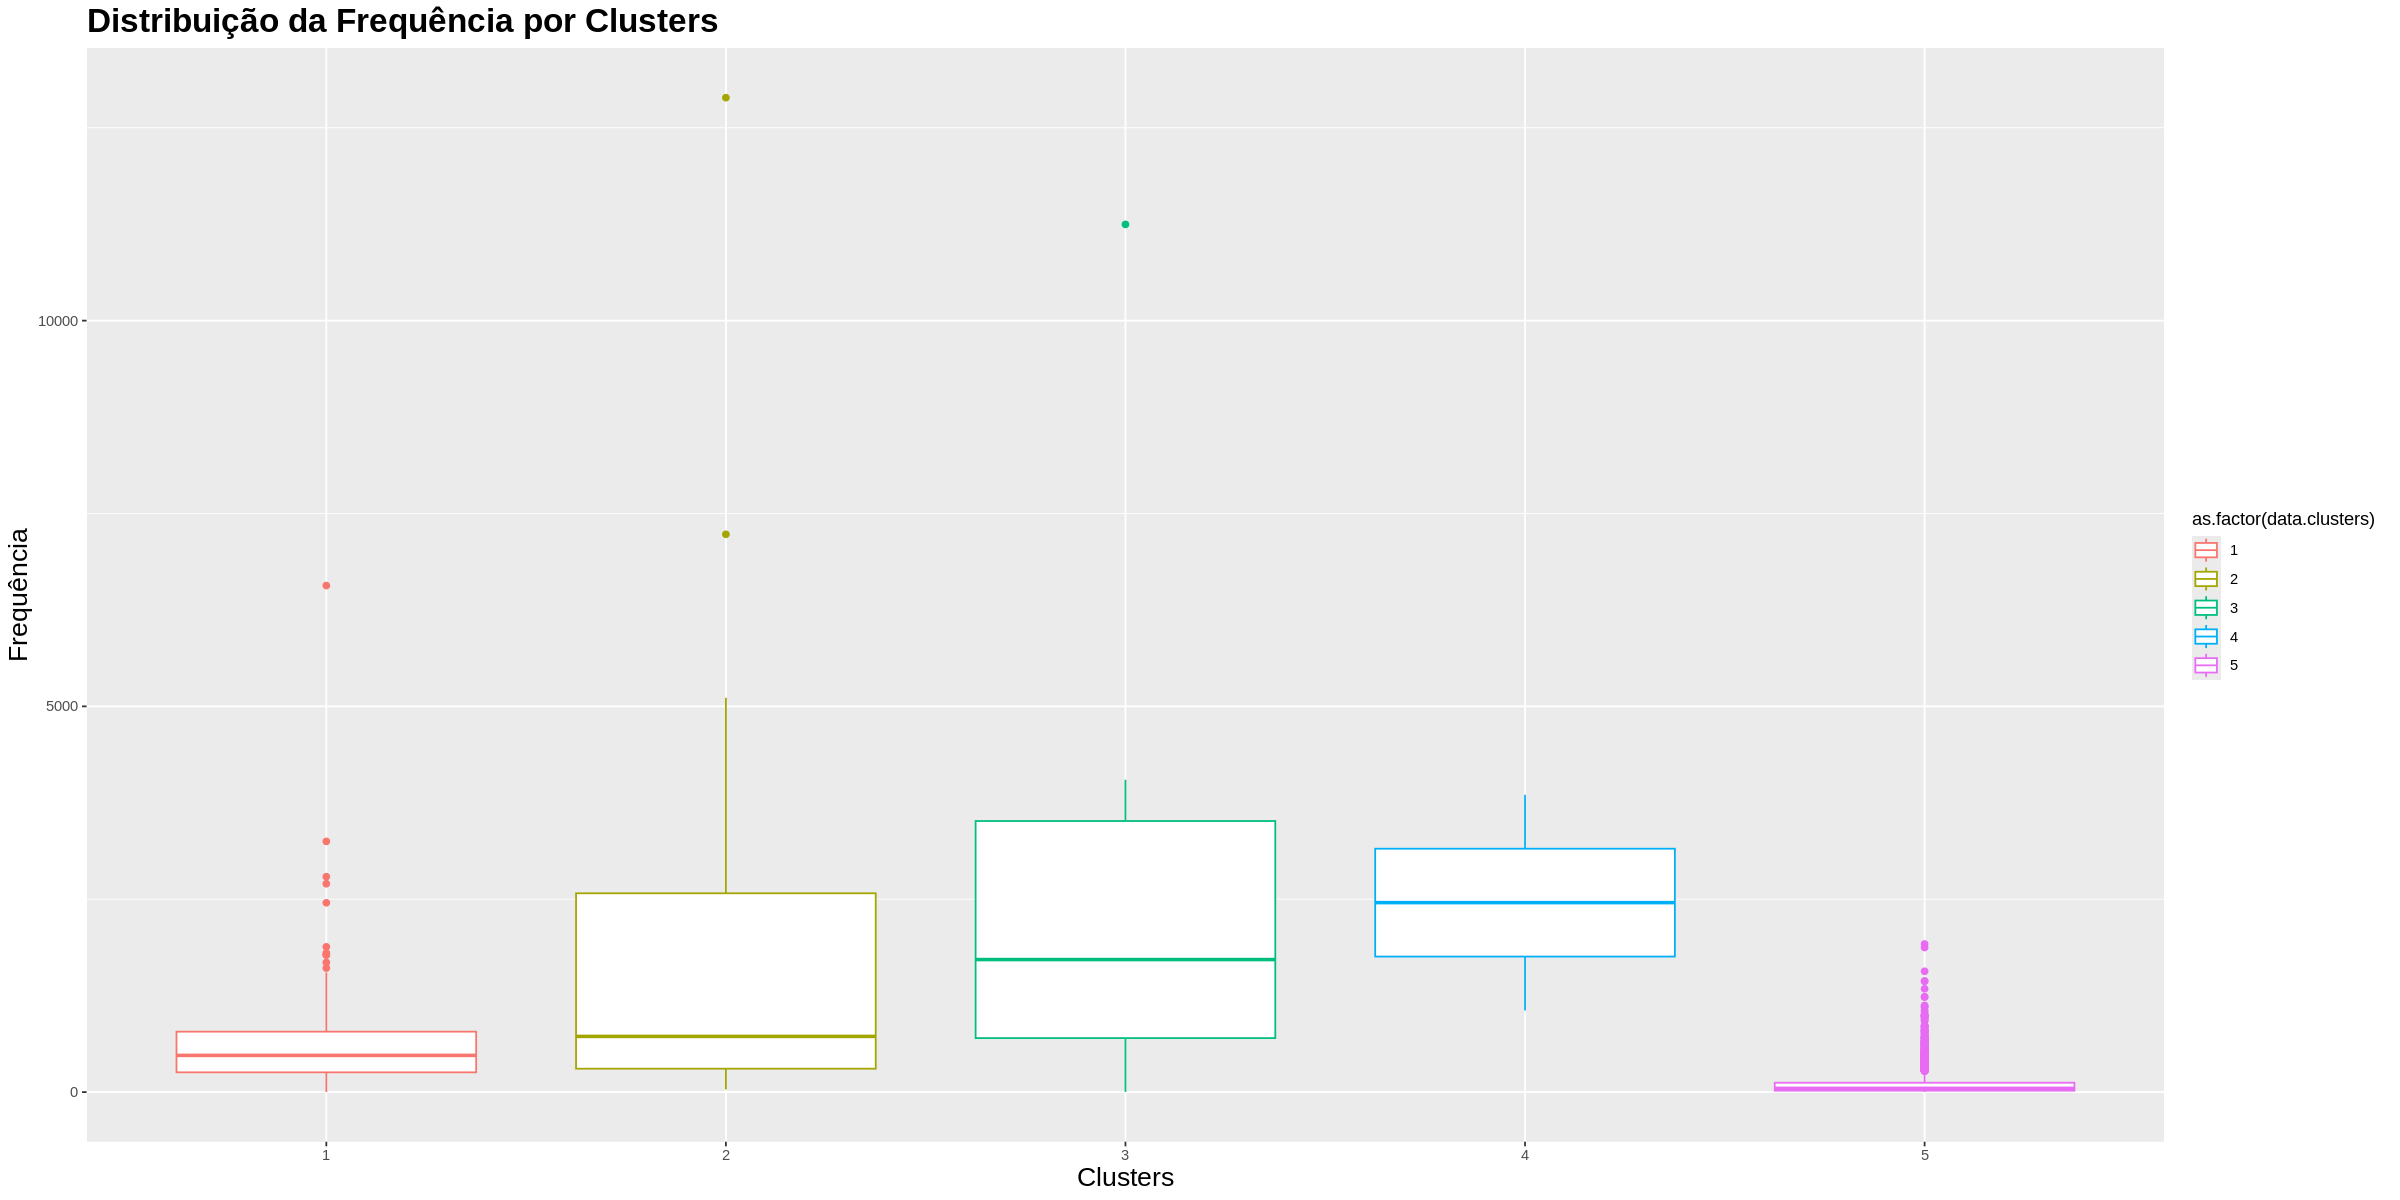

In [59]:
# Boxplor de Frequência por clusters
ggplot(clusters_clientes, aes(as.factor(data.clusters), data.Frequencia)) +
  geom_boxplot(aes(colour = as.factor(data.clusters))) +
   labs(title = "Distribuição da Frequência por Clusters",
       x = "Clusters",
       y = "Frequência") +
  theme(
    plot.title = element_text(size = 20, face = "bold"),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16)
  )

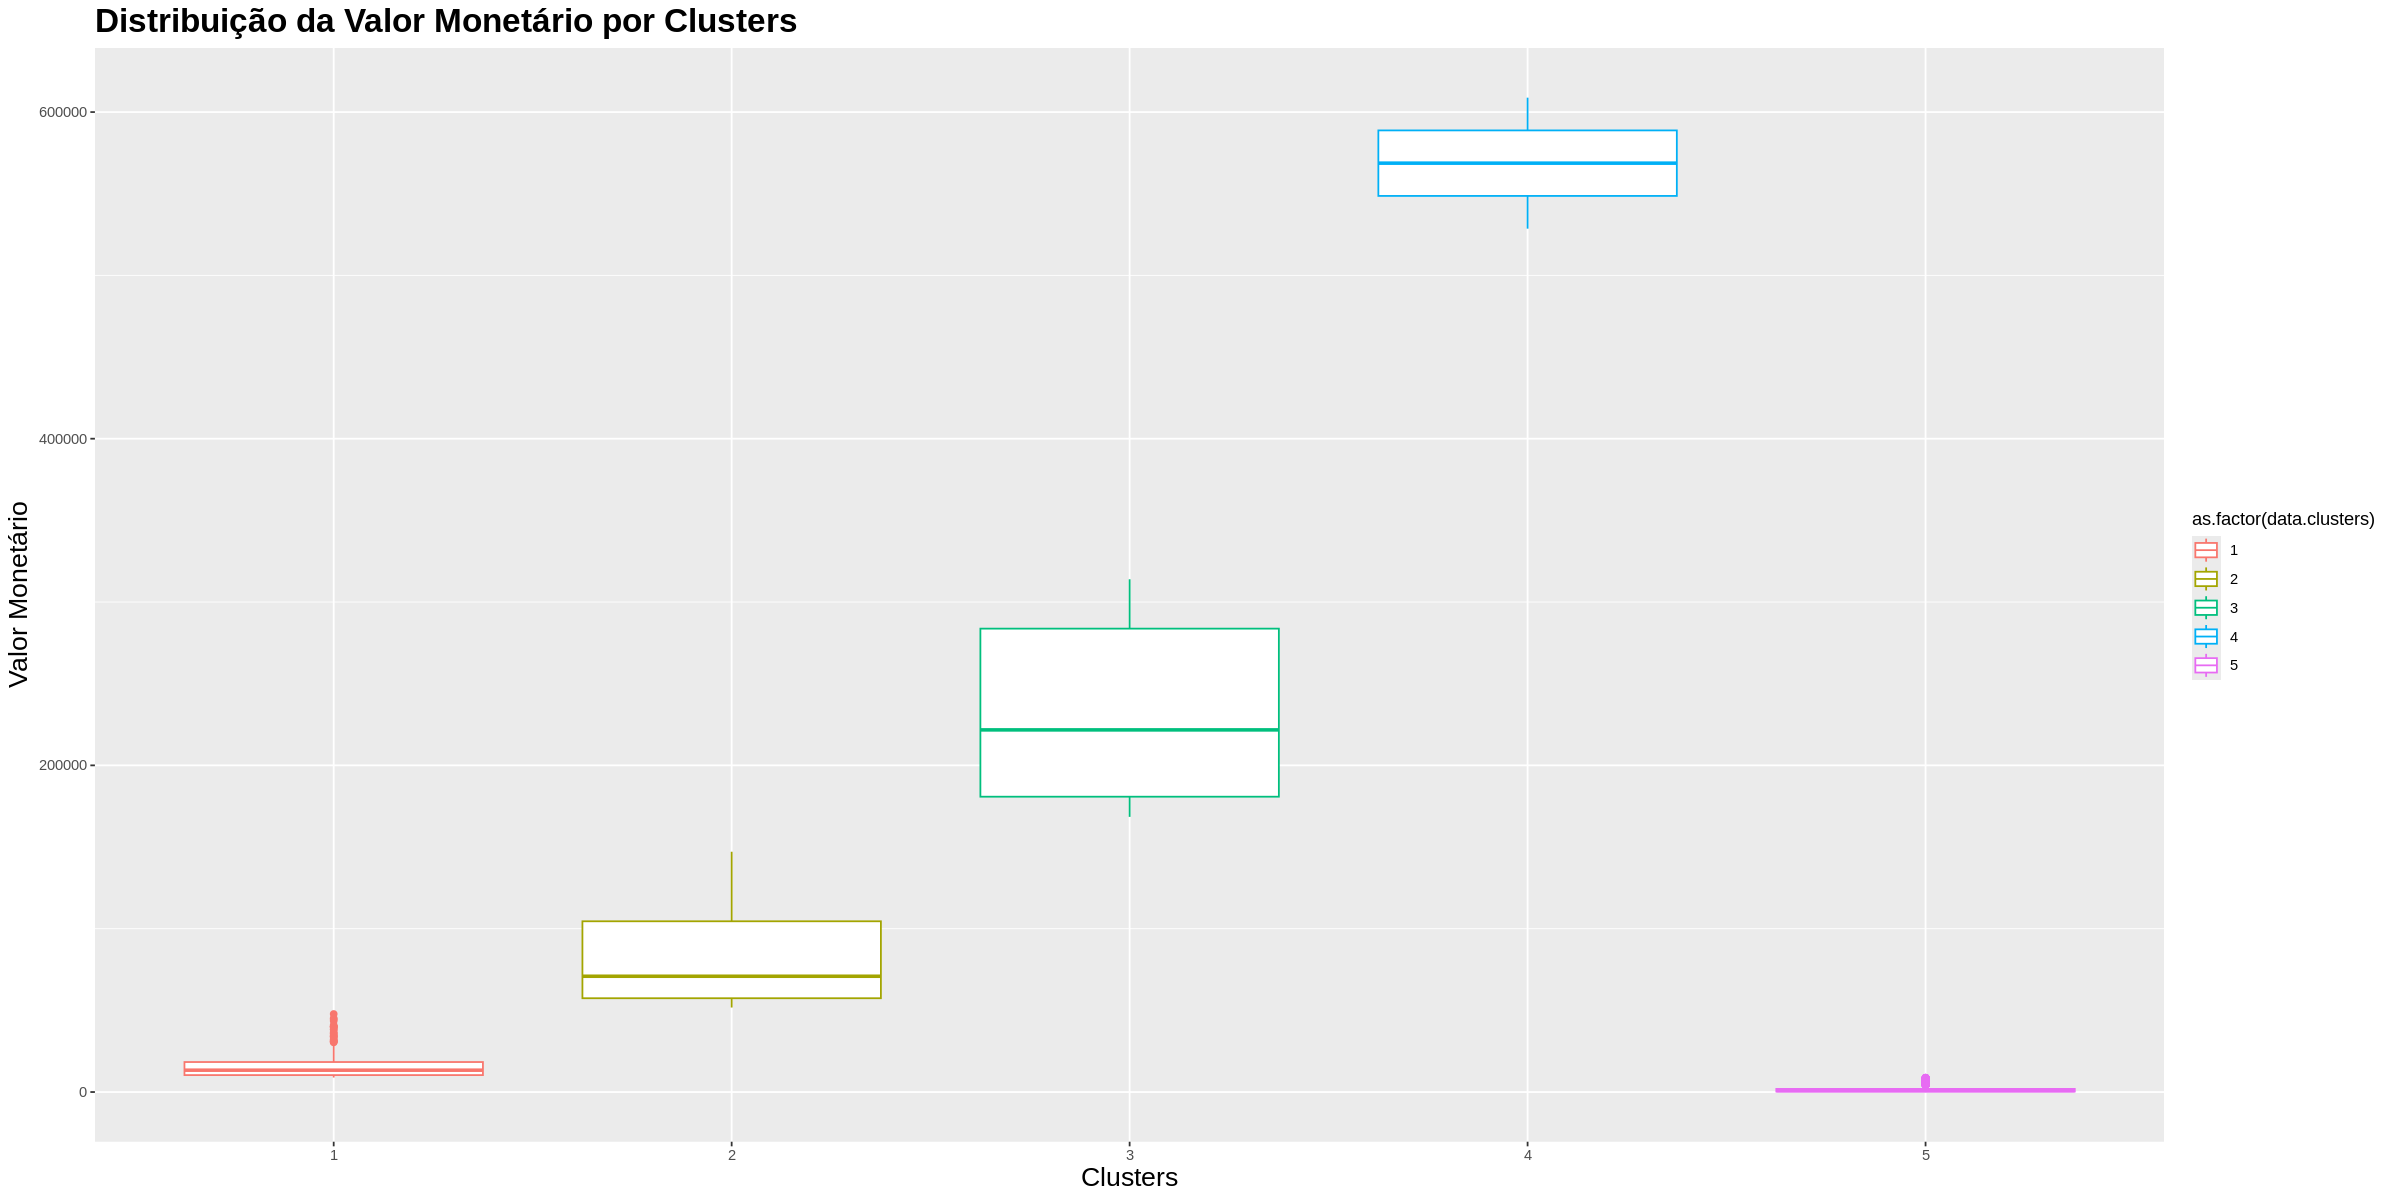

In [61]:
# Boxplor de Valor Monetário por clusters
ggplot(clusters_clientes, aes(as.factor(data.clusters), data.Monetario)) +
  geom_boxplot(aes(colour = as.factor(data.clusters))) +
   labs(title = "Distribuição da Valor Monetário por Clusters",
       x = "Clusters",
       y = "Valor Monetário") +
  theme(
    plot.title = element_text(size = 20, face = "bold"),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16)
  )

# 5. Análise dos Clusters:

Recência Média: A recência média representa o quão recentemente os clientes de um cluster realizaram uma transação. Dentro deste contexto, o cluster 5 apresenta a melhor média (menor), indicando que são possíveis usuários mais ativos e/ou engajados com a marca. Em contrapartida, o cluster 2 apresenta uma média 7 vezes maior que o cluster 5, possivelmente este grupo não está envolvido com a marca ou estão se afastando;

Frequência Média: A frequência média indica com que frequência os clientes de um cluster realizam transações. O cluster 5 apresenta uma frequência média de 228, indicando clientes possivelmente fiéis e que retornam regularmente para realizarem novas compras. O cluster 2 apresenta um frequência de 19, indicando clientes menos engajados e que realizam compras de forma esporádicas;

Valor Monetário Médio: O valor monetário representa o valor médio das transações realizadas pelos clientes de um cluster. O cluster 5 apresenta uma média de 4370.4, demonstrando que os clientes estão gastando mais em cada transação, o que indica maior lealdade ou interesse em serviços e nos produtos da marca.